# Centrality plots and stats

In [10]:
import pickle
import numpy as np
import networkx as nx
import scipy
import matplotlib.pyplot as plt
from itertools import product, permutations
from collections import defaultdict
from copy import copy
import os

import scienceplots

plt.style.use(['science'])

from useful_functions import *

## Load data and transform node indices into labels

In [11]:
all_centralities = {}

for file in os.listdir('CentralityData'):
    
    if 'cent' not in file:
        continue
    
    with open(f'CentralityData/{file}', 'rb') as f:
        
        name = file.split('_')[1].split('.')[0]
        all_centralities[name] = pickle.load(f)

In [12]:
all_centralities_names = {}

for name, rankings in all_centralities.items():
    
    labels = rankings['labels']
    inv_labels = {index: molec for molec, index in labels.items()}
    
    EC = {inv_labels[index]:cent for index, cent in rankings['EC'].items()} 
    HEC = {inv_labels[index]:cent for index, cent in rankings['HEC'].items()} 
    
    all_centralities_names[name] = (EC, HEC)

## Relation with in/out-degree

## Top nodes table

In [48]:
K = 5 
array = [["-" for _ in range(len(all_centralities)+1)]] + [["-" for _ in range(2*len(all_centralities)+1)] for _ in range(K+1)]
for i, (name, (EC, HEC)) in enumerate(all_centralities_names.items()):
    print(name, list(topN(EC, K).keys()), list(topN(HEC, K).keys()))
    
    array[0][i+1] = f"{name}"
    
    array[1][2*i+1] = f"EC"
    array[1][2*i+2] = f"HEC"
        
    for k in range(K):
        
        array[k+2][0] = str(k+1)
        
        array[k+2][2*i+1] = list(topN(EC, K).keys())[k]
        array[k+2][2*i+2] = list(topN(HEC, K).keys())[k]
        
    

astro ['H', 'H2', 'CO', 'C', 'CN'] ['E', 'C', 'C+', 'O', 'H+']
unibi ['H', 'H2', 'CO', 'C', 'He'] ['e-', 'He+', 'Photon', 'O', 'C']
uva ['H', 'H2', 'C', 'CO', 'CN'] ['e-', 'He+', 'Photon', 'C+', 'H+']
RTG ['H', 'OH', 'O', 'CH3', 'HCO'] ['OH', 'H', 'O', 'CH3', 'O2']
surface ['H2', 'CH4', 'H', 'CH3', 'NO'] ['H', 'CH3SH', 'CH3', 'H2CS', 'HNO']


In [49]:
array

[['-', 'astro', 'unibi', 'uva', 'RTG', 'surface'],
 ['-', 'EC', 'HEC', 'EC', 'HEC', 'EC', 'HEC', 'EC', 'HEC', 'EC', 'HEC'],
 ['1', 'H', 'E', 'H', 'e-', 'H', 'e-', 'H', 'OH', 'H2', 'H'],
 ['2', 'H2', 'C', 'H2', 'He+', 'H2', 'He+', 'OH', 'H', 'CH4', 'CH3SH'],
 ['3', 'CO', 'C+', 'CO', 'Photon', 'C', 'Photon', 'O', 'O', 'H', 'CH3'],
 ['4', 'C', 'O', 'C', 'O', 'CO', 'C+', 'CH3', 'CH3', 'CH3', 'H2CS'],
 ['5', 'CN', 'H+', 'He', 'C', 'CN', 'H+', 'HCO', 'O2', 'NO', 'HNO']]

In [59]:
tex = ""
for i, line in enumerate(array):
    
    if i == 0:
        tex += line[0] + r" & \multicolumn{2}{c|}{\bf " + r"} & \multicolumn{2}{c|}{\bf ".join(line[1:]) + "} \\\ \n"
    elif i == 1:
        tex += line[0] + r" & {\bf " + r"} & {\bf ".join(line[1:]) + "} \\\ \n"
    else:
        tex += " & ".join(line) + " \\\ \n"

print(tex)

- & \multicolumn{2}{c|}{\bf astro} & \multicolumn{2}{c|}{\bf unibi} & \multicolumn{2}{c|}{\bf uva} & \multicolumn{2}{c|}{\bf RTG} & \multicolumn{2}{c|}{\bf surface} \\ 
- & {\bf EC} & {\bf HEC} & {\bf EC} & {\bf HEC} & {\bf EC} & {\bf HEC} & {\bf EC} & {\bf HEC} & {\bf EC} & {\bf HEC} \\ 
1 & H & E & H & e- & H & e- & H & OH & H2 & H \\ 
2 & H2 & C & H2 & He+ & H2 & He+ & OH & H & CH4 & CH3SH \\ 
3 & CO & C+ & CO & Photon & C & Photon & O & O & H & CH3 \\ 
4 & C & O & C & O & CO & C+ & CH3 & CH3 & CH3 & H2CS \\ 
5 & CN & H+ & He & C & CN & H+ & HCO & O2 & NO & HNO \\ 



## Network centrality visualization

In [99]:
name = ("ReactionTemplate-2F", "RTG-2F")

with open(f"ProcessedHypergraphs/Chemical/{name[0]}.pkl",'rb') as f:
    H = pickle.load(f)
    
with open(f"CentralityData/Chemical/cent_{name[1]}.pkl",'rb') as g:
    cent = pickle.load(g)

In [100]:
G = standard_network(H)
len(G), len(G.edges)

(55, 529)

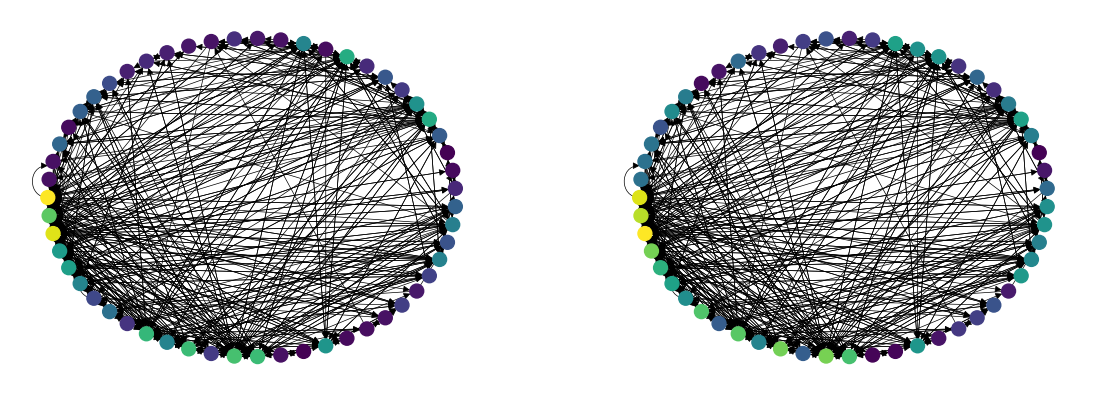

In [101]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

ECcolor = [cent["EC"][cent["labels"][node]] for node in G.nodes]
HECcolor = [cent["HEC"][cent["labels"][node]] for node in G.nodes]

pos = nx.shell_layout(G)

nx.draw(G, ax=ax[0], pos=pos, with_labels=False, node_size=100, node_color=ECcolor, width=0.5)
nx.draw(G, ax=ax[1], pos=pos, with_labels=False, node_size=100, node_color=HECcolor, width=0.5)
#plt.savefig("sw0.png",dpi=500)